<a href="https://colab.research.google.com/github/renatoquiliche/DataScience-PUCRio-FB/blob/main/Task%202/Evaluation/Yiselis_Carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
library(ISLR)
require(tree)
library(rpart)
library(rpart.plot)
library(mccr)
require(mccr)
library(dplyr)
library(caret)
library(fastDummies)

In [39]:
##Carregar o dataset##

ds <- read.csv("https://raw.githubusercontent.com/renatoquiliche/DataScience-PUCRio-FB/main/Data/DS_salarios/ds_salaries.csv")

[1] 425  14

   predict_unseen
     0  1  2
  0  4  4 17
  1  6 78 20
  2  2 12 39

[1] "Accuracy for test 0.664835164835165"


[1] 0.3879725

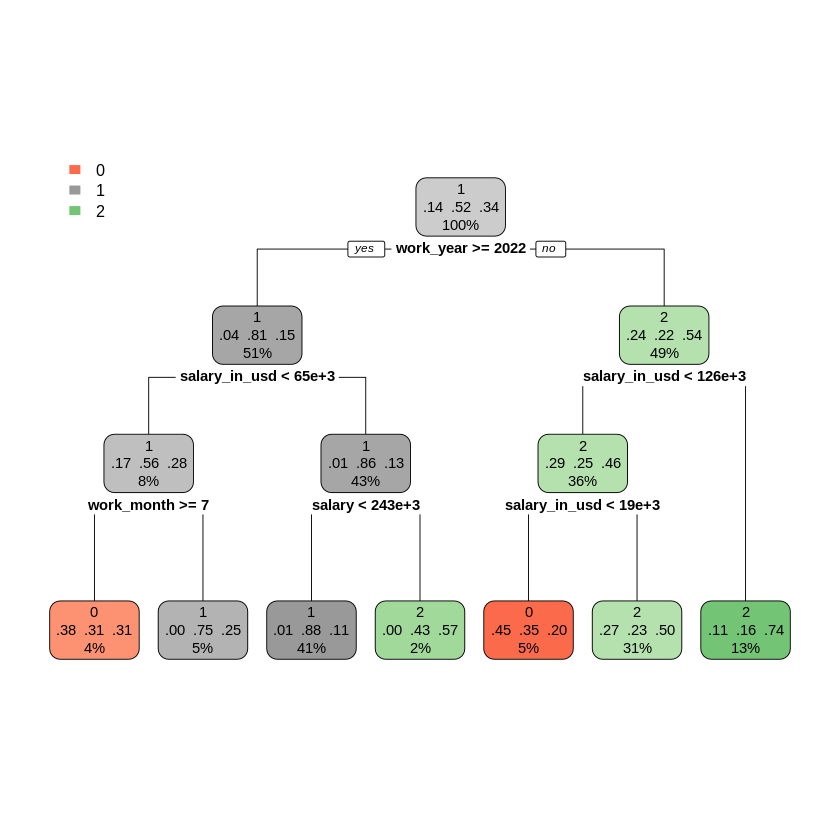

In [40]:
# 1

ds$company_size <- ifelse(ds$company_size=="S", 0,
            ifelse(ds$company_size=="M", 1,
                   2))
ds$experience_level <- ifelse(ds$experience_level=="EN", 1,
                          ifelse(ds$experience_level=="MI", 2,
                          ifelse(ds$experience_level=="SE", 3,
                                 4)))

ds$employment_type_PT <- ifelse(ds$employment_type == "PT", 1, 0)
ds$employment_type_FT <- ifelse(ds$employment_type == "FT", 1, 0)
ds$employment_type_CT <- ifelse(ds$employment_type == "CT", 1, 0)
ds$employment_type_FL <- ifelse(ds$employment_type == "FL", 1, 0)

ds$job_title <- ifelse(ds$job_title== "3D Computer Vision Researcher", 1, 0)
ds$job_title <- ifelse(ds$job_title =="AI Scientist", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Analytics Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Applied Data Scientist", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Applied Machine Learning Scientist", 1, 0)
ds$job_title <- ifelse(ds$job_title == "BI Data Analyst", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Big Data Architect", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Big Data Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Business Data Analyst", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Cloud Data Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Computer Vision Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Computer Vision Software Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Analyst", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Analytics Lead", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Analytics Manager", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Analytics Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Architect", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Engineering Manager", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Science Consultant", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Science Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Data Scientist", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Director of Data Engineering", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Director of Data Science", 1, 0)
ds$job_title <- ifelse(ds$job_title == "ETL Developer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Finance Data Analyst", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Head of Data", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Head of Data Science", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Lead Data Analyst", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Lead Data Scientist", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Lead Machine Learning Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Machine Learning Developer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Machine Learning Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Machine Learning Infrastructure Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Machine Learning Scientist", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Marketing Data Analyst", 1, 0)
ds$job_title <- ifelse(ds$job_title == "ML Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Principal Data Analyst", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Principal Data Scientist", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Principal Data Engineer", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Research Scientist", 1, 0)
ds$job_title <- ifelse(ds$job_title == "Staff Data Scientist", 1, 0)

ds$salary_currency <- ifelse(ds$salary_currency == "INR", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "DKK", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "USD", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "EUR", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "HUF", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "CAD", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "GBP", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "SGD", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "BRL", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "JPY", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "MXN", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "PLN", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "GBP", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "TRY", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "CHF", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "CNY", 1, 0)
ds$salary_currency <- ifelse(ds$salary_currency == "AUD", 1, 0)


ds$employee_residence <- ifelse(ds$employee_residence == "AE", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "AR", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "AT", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "AU", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "BE", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "BG", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "BO", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "BR", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "CA", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "DE", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "CZ", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "CO", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "CN", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "CL", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "CH", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "DK", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "DZ", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "EE", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "ES", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "FR", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "GB", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "GR", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "HK", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "HR", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "HU", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "IE", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "IN", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "IQ", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "IR", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "IT", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "JE", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "JP", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "KE", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "LU", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "MD", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "MT", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "MX", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "MY", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "NG", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "NL", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "NZ", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "PH", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "PK", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "PR", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "PL", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "PT", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "RO", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "RS", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "RU", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "SG", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "SI", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "TN", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "TR", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "UA", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "US", 1, 0)
ds$employee_residence <- ifelse(ds$employee_residence == "VN", 1, 0)


ds_small <- ds[c("work_year", "work_month",
                 "salary", "salary_in_usd", "remote_ratio",
                 "experience_level", "employment_type_PT","employment_type_FT","employment_type_CT","employment_type_FL","job_title","salary_currency", "employee_residence",
                 "company_size")]


#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(ds_small), replace=TRUE, prob=c(0.7,0.3))
data_train  <- ds_small[sample, ]
data_test   <- ds_small[!sample, ]

# train 2 y 2.1


fit <- rpart(company_size~., data = data_train, method = 'class', maxdepth = 3, cp=0.00001)


dim(data_train)

# 2.2
rpart.plot(fit, extra= 104)

#3 Interpret the results of the decision tree
#With a depth of 3 the years of work, if the Yes alternative prevails, it affects 42%, if the No prevails, it affects 58%, which allows the approach of salary in usd <133, if this value is greater, it affects by 14%, if the opposite happens, the value takes 44%, so this value allows having two alternatives salary in usd<19, if this decision is fulfilled, it generates 5%, otherwise it generates 39%


# 4.1.1 prediction

predict_unseen <-predict(fit, data_test, type = 'class')

table_mat <- table(data_test$company_size, predict_unseen)
table_mat
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy for test', accuracy_Test))

# 4.1.2
mccr(data_test$company_size,predict_unseen)